# Interpolating temperature data

Here are 5-year averages of the worldwide temperature anomaly as compared to the 1951-1980 average (source: NASA).

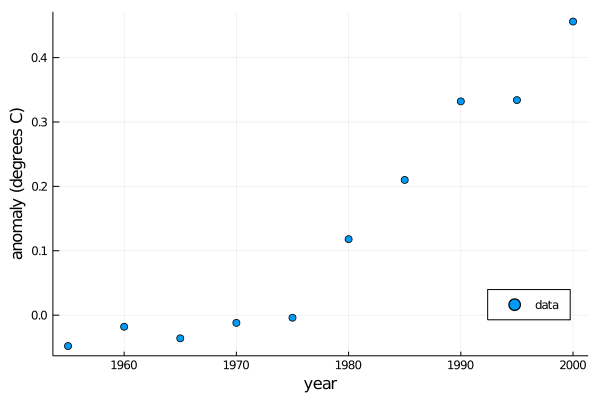

In [1]:
t = 1955:5:2000
y = [ -0.0480, -0.0180, -0.0360, -0.0120, -0.0040,
    0.1180, 0.2100, 0.3320, 0.3340, 0.4560 ];
    
using Plots
scatter(t,y,label="data",
    xlabel="year",ylabel="anomaly (degrees C)",leg=:bottomright)

A polynomial interpolant can be used to fit the data. Here we build one using a Vandermonde matrix. First, though, we express time as decades since 1950, as it improves the condition number of the matrix.

In [2]:
t = @. (t-1950)/10; 
V = [ t[i]^j for i=1:length(t), j=0:length(t)-1 ]
c = V\y

10-element Array{Float64,1}:
  -14.114000003719966
   76.36173811538407
 -165.4559722658534
  191.9605667174846
 -133.2734722578299
   58.015577793493335
  -15.962888893287804
    2.6948063499633275
   -0.25466666673964783
    0.01031111111412555

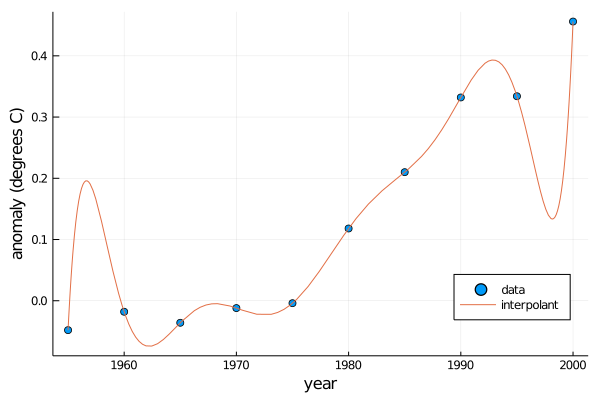

In [3]:
using Polynomials
p = Polynomial(c)
f = s -> p((s-1950)/10)
plot!(f,1955,2000,label="interpolant")

As you can see, the interpolant does represent the data, in a sense. However it's a crazy-looking curve for the application. Trying too hard to reproduce all the data exactly is known as _overfitting_.